In [78]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_One\Data\Raw_Data\titanic.csv")

In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
def missing_val(df):
    for col in df.columns:
        if df[col].isnull().sum():
            if df[col].dtype == "object":
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                df[col] = df[col].fillna(df[col].mean())
    return df 

In [81]:
df = missing_val(df)

In [82]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder


def encoder_cat(df, one_hot_threshold=6):
    encoder = LabelEncoder()


    for col in df.columns:
        if df[col].dtype=="object":
            if df[col].nunique() <= one_hot_threshold:
                dummies = pd.get_dummies(df[col], prefix="col", dtype=int)
                df = pd.concat([df.drop(columns=[col]), dummies], axis=1)

            else:
                df[col] = encoder.fit_transform(df[col])
    return df 

In [84]:
df = encoder_cat(df)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int64  
 10  col_female   891 non-null    int64  
 11  col_male     891 non-null    int64  
 12  col_C        891 non-null    int64  
 13  col_Q        891 non-null    int64  
 14  col_S        891 non-null    int64  
dtypes: float64(2), int64(13)
memory usage: 104.5 KB


In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,col_female,col_male,col_C,col_Q,col_S
0,1,0,3,108,22.0,1,0,523,7.2500,47,0,1,0,0,1
1,2,1,1,190,38.0,1,0,596,71.2833,81,1,0,1,0,0
2,3,1,3,353,26.0,0,0,669,7.9250,47,1,0,0,0,1
3,4,1,1,272,35.0,1,0,49,53.1000,55,1,0,0,0,1
4,5,0,3,15,35.0,0,0,472,8.0500,47,0,1,0,0,1


# Id ustuni va  Target ustuni scaling qilinmaydi 

In [58]:
import matplotlib.pyplot as plt 

def plot_range(df, title):
    plt.figure()
    plt.boxplot(df.values, labels=df.columns)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.ylabel("Qiymatlar Diapazoni")
    plt.tight_layout()
    plt.show()

C:\maya_temp\ipykernel_16000\4102644258.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.values, labels=df.columns)


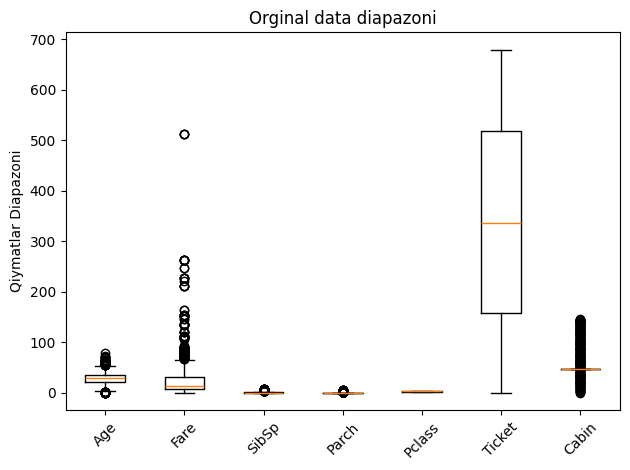

In [59]:
raw_cols = [
    'Age', "Fare", "SibSp", "Parch", "Pclass", "Ticket", "Cabin"
]

plot_range(df[raw_cols], "Orginal data diapazoni")

# Standart Scaling 

In [60]:
from sklearn.preprocessing import StandardScaler

num_col = [
    'Age', "SibSp", "Parch", "Fare", 'Pclass', "col_female", "col_male", 'col_C', 'col_Q', "col_S", "Cabin", "Ticket", "Name"
]

scaler = StandardScaler()

df[num_col] = scaler.fit_transform(df[num_col])

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,col_female,col_male,col_C,col_Q,col_S
0,1,0,0.827377,-1.310217,-0.592481,0.432793,-0.473674,0.918966,-0.502445,-0.281881,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,2,1,-1.566107,-0.991410,0.638789,0.432793,-0.473674,1.282625,0.786845,1.161545,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,3,1,0.827377,-0.357685,-0.284663,-0.474545,-0.473674,1.646283,-0.488854,-0.281881,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,4,1,-1.566107,-0.672604,0.407926,0.432793,-0.473674,-1.442322,0.420730,0.057748,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,5,0,0.827377,-1.671790,0.407926,-0.474545,-0.473674,0.664904,-0.486337,-0.281881,-0.737695,0.737695,-0.482043,-0.307562,0.615838


C:\maya_temp\ipykernel_16000\4102644258.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.values, labels=df.columns)


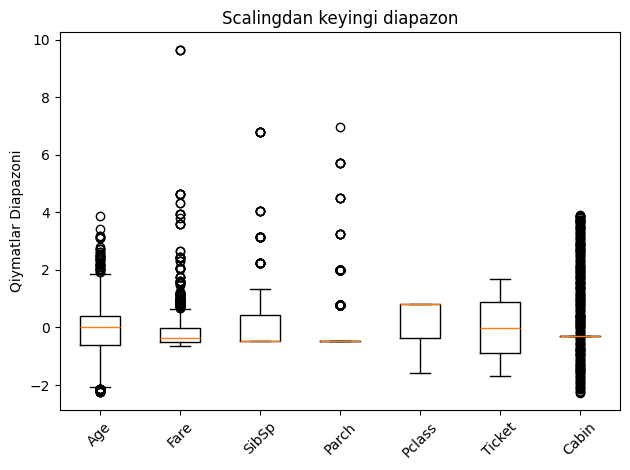

In [62]:
scaled_cols = [
    'Age', "Fare", "SibSp", "Parch", "Pclass", "Ticket", "Cabin"
]

plot_range(df[scaled_cols], "Scalingdan keyingi diapazon")

# Min Max Scaling 

In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,col_female,col_male,col_C,col_Q,col_S
0,1,0,3,108,22.0,1,0,523,7.2500,47,0,1,0,0,1
1,2,1,1,190,38.0,1,0,596,71.2833,81,1,0,1,0,0
2,3,1,3,353,26.0,0,0,669,7.9250,47,1,0,0,0,1
3,4,1,1,272,35.0,1,0,49,53.1000,55,1,0,0,0,1
4,5,0,3,15,35.0,0,0,472,8.0500,47,0,1,0,0,1


In [73]:
from sklearn.preprocessing import MinMaxScaler

num_col = [
    'Age', "SibSp", "Parch", "Fare", 'Pclass', "col_female", "col_male", 'col_C', 'col_Q', "col_S", "Cabin", "Ticket", "Name"
]

scaler = MinMaxScaler()

df[num_col] = scaler.fit_transform(df[num_col])

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,col_female,col_male,col_C,col_Q,col_S
0,1,0,1.0,0.121348,0.271174,0.125,0.0,0.769118,0.014151,0.321918,0.0,1.0,0.0,0.0,1.0
1,2,1,0.0,0.213483,0.472229,0.125,0.0,0.876471,0.139136,0.554795,1.0,0.0,1.0,0.0,0.0
2,3,1,1.0,0.396629,0.321438,0.000,0.0,0.983824,0.015469,0.321918,1.0,0.0,0.0,0.0,1.0
3,4,1,0.0,0.305618,0.434531,0.125,0.0,0.072059,0.103644,0.376712,1.0,0.0,0.0,0.0,1.0
4,5,0,1.0,0.016854,0.434531,0.000,0.0,0.694118,0.015713,0.321918,0.0,1.0,0.0,0.0,1.0


In [75]:
import matplotlib.pyplot as plt 

def plot_range(df, title):
    plt.figure()
    plt.boxplot(df.values, labels=df.columns)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.ylabel("Qiymatlar Diapazoni")
    plt.tight_layout()
    plt.show()

C:\maya_temp\ipykernel_16000\4102644258.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.values, labels=df.columns)


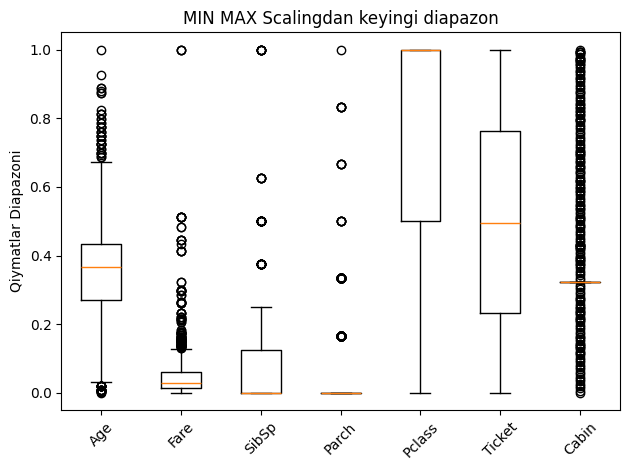

In [76]:
scaled_cols = [
    'Age', "Fare", "SibSp", "Parch", "Pclass", "Ticket", "Cabin"
]

plot_range(df[scaled_cols], "MIN MAX Scalingdan keyingi diapazon")

# Robust Scaling 

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,col_female,col_male,col_C,col_Q,col_S
0,1,0,3,108,22.0,1,0,523,7.2500,47,0,1,0,0,1
1,2,1,1,190,38.0,1,0,596,71.2833,81,1,0,1,0,0
2,3,1,3,353,26.0,0,0,669,7.9250,47,1,0,0,0,1
3,4,1,1,272,35.0,1,0,49,53.1000,55,1,0,0,0,1
4,5,0,3,15,35.0,0,0,472,8.0500,47,0,1,0,0,1


In [88]:
from sklearn.preprocessing import RobustScaler

num_col = [
    'Age', "SibSp", "Parch", "Fare", 'Pclass', "col_female", "col_male", 'col_C', 'col_Q', "col_S", "Cabin", "Ticket", "Name"
]

scaler = RobustScaler()

df[num_col] = scaler.fit_transform(df[num_col])

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,col_female,col_male,col_C,col_Q,col_S
0,1,0,0.0,-0.757303,-0.592240,1.0,0.0,0.515235,-0.312011,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,-2.0,-0.573034,0.638529,1.0,0.0,0.717452,2.461242,34.0,1.0,-1.0,1.0,0.0,-1.0
2,3,1,0.0,-0.206742,-0.284548,0.0,0.0,0.919668,-0.282777,0.0,1.0,-1.0,0.0,0.0,0.0
3,4,1,-2.0,-0.388764,0.407760,1.0,0.0,-0.797784,1.673732,8.0,1.0,-1.0,0.0,0.0,0.0
4,5,0,0.0,-0.966292,0.407760,0.0,0.0,0.373961,-0.277363,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
import matplotlib.pyplot as plt 

def plot_range(df, title):
    plt.figure()
    plt.boxplot(df.values, labels=df.columns)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.ylabel("Qiymatlar Diapazoni")
    plt.tight_layout()
    plt.show()

C:\maya_temp\ipykernel_16000\4102644258.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.values, labels=df.columns)


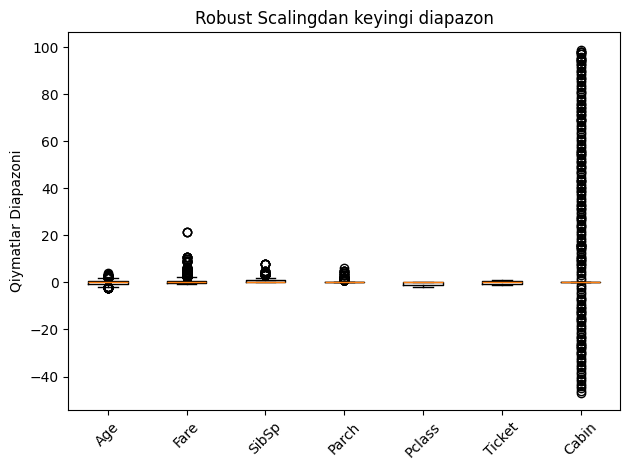

In [91]:
scaled_cols = [
    'Age', "Fare", "SibSp", "Parch", "Pclass", "Ticket", "Cabin"
]

plot_range(df[scaled_cols], "Robust Scalingdan keyingi diapazon")

In [92]:
df["Cabin"].describe()

count    891.000000
mean       6.639731
std       23.568293
min      -47.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       99.000000
Name: Cabin, dtype: float64

In [93]:
df["Cabin"].max()

np.float64(99.0)

In [94]:
df["Cabin"].min()

np.float64(-47.0)

In [95]:
df["Fare"].max()

np.float64(21.56273820248077)

In [96]:
df["Fare"].min()

np.float64(-0.6260047813734322)